# Tahaluf Training | Competition (4) - Twitter Sentiment Analysis

***

***
# 1- Get the Data
***

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score,classification_report
from sklearn.cluster import KMeans
from nltk.cluster import KMeansClusterer
from sklearn.cluster import DBSCAN

drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data= pd.read_csv("/content/drive/MyDrive/train1.csv")
data.text.head()

0    @JennaMadison awww, thanks . I like you too, a...
1    &quot;The man&quot; is gone for a week. Pouting! 
2    stupid itunes keeps crashing so i can't update...
3                           is ready for the weekend! 
4    @schofe must be great getting all the freebies...
Name: text, dtype: object

In [ ]:
data.shape

(1023999, 6)

In [ ]:
test= pd.read_csv("/content/drive/MyDrive/test1.csv")
ID_test=test["id"]
test.head()

,date,flag,user,text,id
0,Sat May 30 18:30:14 PDT 2009,NO_QUERY,susanhutchinson,@smilingtime Love the profile pic. I have a p...,1136227
1,Sun Jun 21 06:43:36 PDT 2009,NO_QUERY,jodgozum,i'm doing a letter to the department.,738556
2,Tue Jun 02 04:49:35 PDT 2009,NO_QUERY,deegarcia104,"@jaycantu merry christmas, pappy. now you look...",1289784
3,Sat Jun 06 14:01:26 PDT 2009,NO_QUERY,voxdolo,Much love to all my rocketeers from @cadiebug ...,1419520
4,Sun May 31 09:21:09 PDT 2009,NO_QUERY,ilove_shoes,i still hate the two people i was on skype wit...,1178091


In [ ]:
test.shape

(256000, 5)

#### Dispaly code .

In [ ]:
pd.set_option('display.max_columns', None)
data.describe()

,id,target
count,1.023999e+06,1.023999e+06
mean,7.999957e+05,5.001362e-01
std,4.621032e+05,5.000002e-01
min,4.000000e+00,0.000000e+00
25%,3.998395e+05,0.000000e+00
50%,8.002190e+05,1.000000e+00
75%,1.200262e+06,1.000000e+00
max,1.599999e+06,1.000000e+00


***
# 2- Discover  The Data
***

### **Train data**

In [ ]:
data.head()

,date,flag,user,text,id,target
0,Wed Jun 03 03:47:24 PDT 2009,NO_QUERY,mayhemstudios,"@JennaMadison awww, thanks . I like you too, a...",1325379,1
1,Mon Jun 01 05:54:18 PDT 2009,NO_QUERY,ruralmama,&quot;The man&quot; is gone for a week. Pouting!,275675,0
2,Wed Jun 17 17:34:38 PDT 2009,NO_QUERY,princesslaylah,stupid itunes keeps crashing so i can't update...,583702,0
3,Fri May 29 11:43:58 PDT 2009,NO_QUERY,candace_lea,is ready for the weekend!,1058019,1
4,Mon Jun 15 12:45:11 PDT 2009,NO_QUERY,joluvs2shop,@schofe must be great getting all the freebies...,1545430,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1023999 entries, 0 to 1023998
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   date    1023999 non-null  object
 1   flag    1023999 non-null  object
 2   user    1023999 non-null  object
 3   text    1023999 non-null  object
 4   id      1023999 non-null  int64 
 5   target  1023999 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 46.9+ MB


In [ ]:
print(f'percentage of uniqueness of id column: {data.id.nunique()/len(data)*100}')
# There is no any duplicated value

percentage of uniqueness of id column: 100.0


In [ ]:
print(f'percentage of uniqueness of user column: {data.user.nunique()/len(data)*100}')

percentage of uniqueness of user column: 48.50805518364764


In [ ]:
data.user.value_counts()

lost_dog           357
webwoke            219
tweetpet           193
mcraddictal        181
SallytheShizzle    180
                  ... 
pooohbusters         1
247missions          1
latrevaherndon       1
xxohmystarz          1
Stephhhx3            1
Name: user, Length: 496722, dtype: int64

In [ ]:
data.describe(include="object")
# there is no variance in flag column
# there are duplicated values in text & user columns

,date,flag,user,text
count,1023999,1023999,1023999,1023999
unique,602272,1,496722,1014262
top,Mon Jun 15 12:53:14 PDT 2009,NO_QUERY,lost_dog,isPlayer Has Died! Sorry
freq,16,1023999,357,147


In [ ]:
data.target.value_counts()

1    512139
0    511860
Name: target, dtype: int64

### **Test data**

In [ ]:
test.head()

,date,flag,user,text,id
0,Sat May 30 18:30:14 PDT 2009,NO_QUERY,susanhutchinson,@smilingtime Love the profile pic. I have a p...,1136227
1,Sun Jun 21 06:43:36 PDT 2009,NO_QUERY,jodgozum,i'm doing a letter to the department.,738556
2,Tue Jun 02 04:49:35 PDT 2009,NO_QUERY,deegarcia104,"@jaycantu merry christmas, pappy. now you look...",1289784
3,Sat Jun 06 14:01:26 PDT 2009,NO_QUERY,voxdolo,Much love to all my rocketeers from @cadiebug ...,1419520
4,Sun May 31 09:21:09 PDT 2009,NO_QUERY,ilove_shoes,i still hate the two people i was on skype wit...,1178091


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256000 entries, 0 to 255999
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   date    256000 non-null  object
 1   flag    256000 non-null  object
 2   user    256000 non-null  object
 3   text    256000 non-null  object
 4   id      256000 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 9.8+ MB


In [ ]:
test.describe(include="object")
# Same notes for train data

,date,flag,user,text
count,256000,256000,256000,256000
unique,216900,1,181148,254812
top,Fri Jun 05 10:59:34 PDT 2009,NO_QUERY,lost_dog,good morning
freq,8,256000,86,27


In [ ]:
test_copy= pd.read_csv("/content/drive/MyDrive/test1.csv")
ID_test=test_copy["id"]

***
# 3- Prepare the data & Train model
***

## A - Feature Engineering

In [ ]:
# Its just a Trial to pass these features with Vectorized features but We could not enter anything else Vectorized Features ( Text )
data["week_day"]=data.date.map(lambda x: x[:3])
data["month"]=data.date.map(lambda x: x[4:7])
data["month_day"]=data.date.map(lambda x: x[8:10])
data["hour"]=data.date.map(lambda x: x[11:13])
data["minute"]=data.date.map(lambda x: x[14:16])
data["second"]=data.date.map(lambda x: x[17:19])

test["week_day"]=test.date.map(lambda x: x[:3])
test["month"]=test.date.map(lambda x: x[4:7])
test["month_day"]=test.date.map(lambda x: x[8:10])
test["hour"]=test.date.map(lambda x: x[11:13])
test["minute"]=test.date.map(lambda x: x[14:16])
test["second"]=test.date.map(lambda x: x[17:19])

In [ ]:
data[['second','hour','minute','month_day']]=data[['second','hour','minute','month_day']].astype("int")
test[['second','hour','minute','month_day']]=test[['second','hour','minute','month_day']].astype("int")

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['week_day']=le.fit_transform(data['week_day'])
test['week_day']=le.transform(test['week_day'])
data['month']=le.fit_transform(data['month'])
test['month']=le.transform(test['month'])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1023999 entries, 0 to 1023998
Data columns (total 12 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   date       1023999 non-null  object
 1   flag       1023999 non-null  object
 2   user       1023999 non-null  object
 3   text       1023999 non-null  object
 4   id         1023999 non-null  int64 
 5   target     1023999 non-null  int64 
 6   week_day   1023999 non-null  int64 
 7   month      1023999 non-null  int64 
 8   month_day  1023999 non-null  int64 
 9   hour       1023999 non-null  int64 
 10  minute     1023999 non-null  int64 
 11  second     1023999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 93.8+ MB


In [ ]:
data.set_index("id",inplace=True)

In [ ]:
data_target = data.target
data.drop(['date', 'flag', 'user'],axis=1,inplace=True)

In [ ]:
test.drop(['date', 'flag','user'],axis=1,inplace=True)

## B- Text preprocessing

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
import string

In [ ]:
data2=data.copy()
def clean_text(text):
    text = str(text).lower()  # Lowercase words
    text = re.sub(r'(\w)\1\1+', r'\1', text)
    text = re.sub('@[0-9a-z_]*', '', text)  # removing @.....
    text = re.sub('#[0-9a-z_]*', '', text)  # removing @.....
    text = re.sub('https?://\S+|www\.\S+', '', text)  #remove links
    text = re.sub('<.*?>+', '', text)
    text = re.sub('\n', '', text)
    text = re.sub(r"www\.[a-z]?\.?(com)+|[a-z]+\.(com)", '', text) # removing URL
    text = re.sub('{link}', '', text) # removing links in {}
    text = re.sub('\[video\]', '', text) # removing video links
    text = re.sub("[^a-z\s\(\-:\)\\\/\];='#]", '', text) # removing Non-Letter characters
    text = re.sub(' u ', ' you ', text)  # replacing u with you
    text = re.sub(' *!', '', text)  # removing !
    return text

"""
    text = re.sub('\[.*?\]', '', text)  # remove text in square brackets
    text = re.sub('https?://\S+|www\.\S+', '', text)  #remove links
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text) #remove punctuation
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)  #remove words containing numbers
    text = re.sub(' bout ', ' about ', text)  # replacing
    text = re.sub(" they're ", ' they are ', text)  # replacing
    text = re.sub(' wut ', ' what ', text)  # replacing
    text = re.sub(' kno ', ' know ', text)  # replacing
    text = re.sub('&[a-z]+;', '', text) # removing HTML reference characters
    text = re.sub('\w*\d\w*', '', text)  #remove words containing numbers
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text) #remove punctuation
    text = re.sub('https?:\/\/\S+', '', text) # removing links
    text = re.sub('\[.*?\]', '', text)  # remove text in square brackets
"""

'\n    text = re.sub(\'\\[.*?\\]\', \'\', text)  # remove text in square brackets\n    text = re.sub(\'https?://\\S+|www\\.\\S+\', \'\', text)  #remove links\n    text = re.sub(\'<.*?>+\', \'\', text)\n    text = re.sub(\'[%s]\' % re.escape(string.punctuation), \'\', text) #remove punctuation\n    text = re.sub(\'\n\', \'\', text)  \n    text = re.sub(\'\\w*\\d\\w*\', \'\', text)  #remove words containing numbers\n    text = re.sub(\' bout \', \' about \', text)  # replacing \n    text = re.sub(" they\'re ", \' they are \', text)  # replacing \n    text = re.sub(\' wut \', \' what \', text)  # replacing\n    text = re.sub(\' kno \', \' know \', text)  # replacing\n    text = re.sub(\'&[a-z]+;\', \'\', text) # removing HTML reference characters\n    text = re.sub(\'\\w*\\d\\w*\', \'\', text)  #remove words containing numbers\n    text = re.sub(\'[%s]\' % re.escape(string.punctuation), \'\', text) #remove punctuation\n    text = re.sub(\'https?:\\/\\/\\S+\', \'\', text) # removing links\

In [ ]:
for x in range(0,50):
  print(data.text[data.target==1].iloc[x])

@JennaMadison awww, thanks . I like you too, always funny! 
is ready for the weekend! 
@schofe must be great getting all the freebies, any you don't want i'm always here 
@havenofbliss - that's the idea... 
I am extremely excited about what *could* happen tomorrow. I'm going to need a little help. 
miss ally bjornberg is amazing 
@keisha_buchanan and hello to you too 
chillin'  About to go to church. Then, my sister is having a graduation party thing. You're square, cause you ain't there.
Watching the interview Zach Levi gave Collider @ subway.  Love him!
@KarinSlegers what if I buy it and remove the foogly beanbag then? 
see u later my friend !!!! 
Hahah New York Goes To Work is the best show. She literally just asked if the pigs on the farm were suppose to be at school.  shelby 
@dlueking I'm not in Kentucky!  I am just going to the local track in CLE for the Kentucky Derby party.  I'm placing some serious bets. 
@rebecca1121 I hear that punching the next person you see in the face i

In [ ]:
data.text=data.text.apply(lambda x: clean_text(x))

In [ ]:
for x in range(0,50):
  print(data.text[data.target==1].iloc[x])

 aw thanks  i like you too always funny 
is ready for the weekend 
 must be great getting all the freebies any you don't want i'm always here 
 - that's the idea 
i am extremely excited about what could happen tomorrow i'm going to need a little help 
miss ally bjornberg is amazing 
 and hello to you too 
chillin'  about to go to church then my sister is having a graduation party thing you're square cause you ain't there
watching the interview zach levi gave collider  subway  love him
 what if i buy it and remove the foogly beanbag then 
see you later my friend  
hahah new york goes to work is the best show she literally just asked if the pigs on the farm were suppose to be at school  shelby 
 i'm not in kentucky  i am just going to the local track in cle for the kentucky derby party  i'm placing some serious bets 
 i hear that punching the next person you see in the face is comforting 
 so excited to find your book  the bx here on ramstein ab germany can't wait  get started psam i one

## - Split data &  model Selection

In [ ]:
x_train,x_test,y_train, y_test = train_test_split(data,data_target, test_size=0.2,stratify=data_target)
x_train.drop("target",axis=1,inplace=True)
x_test.drop("target",axis=1,inplace=True)

In [ ]:
tfidf_vectorizer = TfidfVectorizer(min_df=2,max_features=6000,sublinear_tf=True,binary=True)
tfidf = tfidf_vectorizer.fit_transform(x_train.text)

### **Modeling**

In [ ]:
tfidf.shape

(819199, 6000)

In [ ]:
kmeans = KMeans(n_clusters=2,max_iter=4000,algorithm="auto").fit(tfidf)

In [ ]:
prediction=kmeans.predict(tfidf_vectorizer.transform(x_train.text))
score = classification_report(y_train, prediction)
print(score)

              precision    recall  f1-score   support

           0       0.53      0.88      0.66    409488
           1       0.64      0.22      0.33    409711

    accuracy                           0.55    819199
   macro avg       0.59      0.55      0.50    819199
weighted avg       0.59      0.55      0.50    819199



In [ ]:
prediction=kmeans.predict(tfidf_vectorizer.transform(x_test.text))
score = classification_report(y_test, prediction)
print(score)

              precision    recall  f1-score   support

           0       0.53      0.88      0.66    102372
           1       0.64      0.22      0.33    102428

    accuracy                           0.55    204800
   macro avg       0.59      0.55      0.50    204800
weighted avg       0.59      0.55      0.50    204800



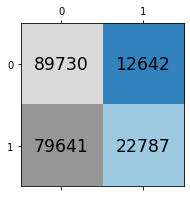

In [ ]:
conf_matrix=confusion_matrix(y_test, prediction)
fig, ax = plt.subplots(figsize=(4, 3))
ax.matshow(conf_matrix, cmap=plt.cm.tab20c)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')

# 4-Test data Section


In [ ]:
test.text=data.text.apply(lambda x: clean_text(x))
mtest = tfidf_vectorizer.transform(test.text)

In [ ]:
predicted =kmeans.predict(mtest)
final_pred = pd.DataFrame()
final_pred["id"] = ID_test
final_pred["target"] = predicted

In [ ]:
final_pred.target.value_counts()

In [ ]:
final_pred.to_csv('submission.csv', index=False)

# Finally! 😎